In [1]:
import pandas as pd
import numpy as np
import os
import category_encoders as ce
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

print('Imported all necesary libraries for feature selection!')

Imported all necesary libraries for feature selection!


In [2]:
irl = pd.read_csv('corkgeo-features.csv', index_col='Unnamed: 0')

In [3]:
irl.head()

,Address,County,Price (€),VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,PriceInflation,Eircode,Latitude,Longitude,DistanceCenter,DistanceSchool,DistancePark,DistanceCar
94123,"10 Deerpark Court, Friars Walk, Cork",Cork,280000.0,1,1,2,2014,1,Cork City,0,Friars Walk Cork,529951.22,T12,51.891104,-8.474261,0.808257,0.371367,0.334321,0.607264
94124,"30 Whitepoint Ave Cobh, Cork",Cork,370000.0,1,1,1,2014,1,Cork City,0,Whitepoint Ave Cobh Cork,700292.68,T12,51.844802,-8.312442,12.501636,0.597510,5.440909,11.244529
94125,"43 Richmond Hill, Cork",Cork,130000.0,1,1,1,2014,1,Cork City,0,Richmond Hill Cork,246048.78,T12,51.903869,-8.471192,0.626745,0.323214,0.129914,0.238164
94126,"Vermont, Ballyhooly Rd, Cork",Cork,155000.0,1,1,1,2014,1,Cork City,0,Ballyhooly Road Cork,293365.85,T12,51.911380,-8.450581,2.096941,0.447549,0.669517,1.805214
94127,"22 Fernwood, Wilton, Cork",Cork,210000.0,1,1,1,2014,1,Cork City,0,Wilton Cork,397463.41,T12,51.882655,-8.507208,2.943974,0.503091,0.823622,2.329469


In [4]:
irl.drop(columns=['VAT Exclusive', 'Town', 'County', 'Address', 'Eircode', 'PriceInflation'], inplace = True)

In [5]:
from category_encoders import TargetEncoder

In [8]:
encoder = TargetEncoder()
irl['Neighbourhood'] = encoder.fit_transform(irl['Neighbourhood'], irl['Price (€)'])

In [11]:
irl.head()

,Price (€),Description of Property,Property Size Description,Year,Month,Apartment,Neighbourhood,Latitude,Longitude,DistanceCenter,DistanceSchool,DistancePark,DistanceCar
94123,280000.0,1,2,2014,1,0,221996.382933,51.891104,-8.474261,0.808257,0.371367,0.334321,0.607264
94124,370000.0,1,1,2014,1,0,338703.299756,51.844802,-8.312442,12.501636,0.597510,5.440909,11.244529
94125,130000.0,1,1,2014,1,0,150351.141667,51.903869,-8.471192,0.626745,0.323214,0.129914,0.238164
94126,155000.0,1,1,2014,1,0,269252.734786,51.911380,-8.450581,2.096941,0.447549,0.669517,1.805214
94127,210000.0,1,1,2014,1,0,234741.592357,51.882655,-8.507208,2.943974,0.503091,0.823622,2.329469


In [12]:
irl.columns

Index(['Price (€)', 'Description of Property', 'Property Size Description',
       'Year', 'Month', 'Apartment', 'Neighbourhood', 'Latitude', 'Longitude',
       'DistanceCenter', 'DistanceSchool', 'DistancePark', 'DistanceCar'],
      dtype='object')

In [13]:
#irl['LogPrice (€)'] = np.log(irl['Price (€)'])
#irl.drop(columns=['Price (€)'], inplace = True)
irl.head()

,Price (€),Description of Property,Property Size Description,Year,Month,Apartment,Neighbourhood,Latitude,Longitude,DistanceCenter,DistanceSchool,DistancePark,DistanceCar
94123,280000.0,1,2,2014,1,0,221996.382933,51.891104,-8.474261,0.808257,0.371367,0.334321,0.607264
94124,370000.0,1,1,2014,1,0,338703.299756,51.844802,-8.312442,12.501636,0.597510,5.440909,11.244529
94125,130000.0,1,1,2014,1,0,150351.141667,51.903869,-8.471192,0.626745,0.323214,0.129914,0.238164
94126,155000.0,1,1,2014,1,0,269252.734786,51.911380,-8.450581,2.096941,0.447549,0.669517,1.805214
94127,210000.0,1,1,2014,1,0,234741.592357,51.882655,-8.507208,2.943974,0.503091,0.823622,2.329469


### Information Gain

In [14]:
x = irl.loc[:, irl.columns != 'Price (€)']
y = irl['Price (€)']

In [15]:
x.shape

(4821, 12)

In [16]:
x

,Description of Property,Property Size Description,Year,Month,Apartment,Neighbourhood,Latitude,Longitude,DistanceCenter,DistanceSchool,DistancePark,DistanceCar
94123,1,2,2014,1,0,221996.382933,51.891104,-8.474261,0.808257,0.371367,0.334321,0.607264
94124,1,1,2014,1,0,338703.299756,51.844802,-8.312442,12.501636,0.597510,5.440909,11.244529
94125,1,1,2014,1,0,150351.141667,51.903869,-8.471192,0.626745,0.323214,0.129914,0.238164
94126,1,1,2014,1,0,269252.734786,51.911380,-8.450581,2.096941,0.447549,0.669517,1.805214
94127,1,1,2014,1,0,234741.592357,51.882655,-8.507208,2.943974,0.503091,0.823622,2.329469
...,...,...,...,...,...,...,...,...,...,...,...,...
127108,1,2,2021,10,0,324694.070192,51.888697,-8.441014,2.416221,0.438803,0.437676,1.822634
127109,1,2,2021,11,0,252471.153846,51.877327,-8.440885,3.189986,0.144313,0.287197,1.792773
127110,1,2,2021,11,0,157766.301545,51.901570,-8.458976,1.002972,0.309483,0.286605,0.664485
127253,1,2,2021,10,0,244052.642822,51.888082,-8.463322,1.302403,0.245382,0.738719,0.947203


In [17]:
y.shape

(4821,)

Feature: 0, Score: -53547.80843
Feature: 1, Score: -1423.53202
Feature: 2, Score: 14016.91554
Feature: 3, Score: 1698.78985
Feature: 4, Score: -9967.70162
Feature: 5, Score: 0.96872
Feature: 6, Score: 6617.88798
Feature: 7, Score: 61129.10772
Feature: 8, Score: 4746.81732
Feature: 9, Score: -5079.62824
Feature: 10, Score: 5497.99726
Feature: 11, Score: -7277.75478


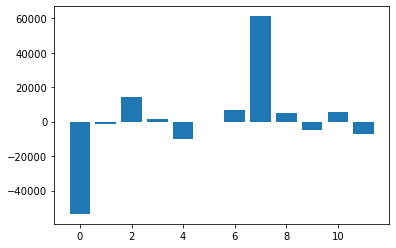

In [18]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

model = LinearRegression()
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.01015
Feature: 1, Score: 0.06071
Feature: 2, Score: 0.17502
Feature: 3, Score: 0.16761
Feature: 4, Score: 0.02116
Feature: 5, Score: 0.34406
Feature: 6, Score: 0.03134
Feature: 7, Score: 0.04018
Feature: 8, Score: 0.03705
Feature: 9, Score: 0.04655
Feature: 10, Score: 0.03511
Feature: 11, Score: 0.03107


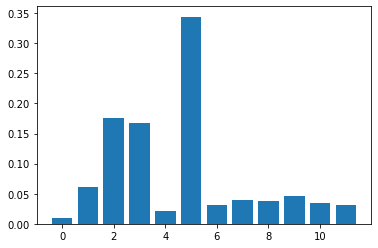

In [19]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.07190
Feature: 1, Score: 0.04197
Feature: 2, Score: 0.07133
Feature: 3, Score: 0.05114
Feature: 4, Score: 0.10557
Feature: 5, Score: 0.37150
Feature: 6, Score: 0.04237
Feature: 7, Score: 0.06051
Feature: 8, Score: 0.05300
Feature: 9, Score: 0.04884
Feature: 10, Score: 0.04636
Feature: 11, Score: 0.03549


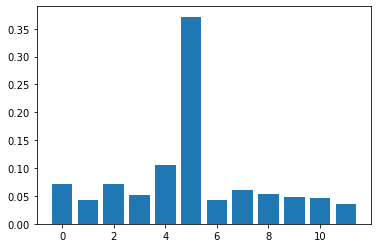

In [20]:
from xgboost import XGBRegressor
model = XGBRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<AxesSubplot:>

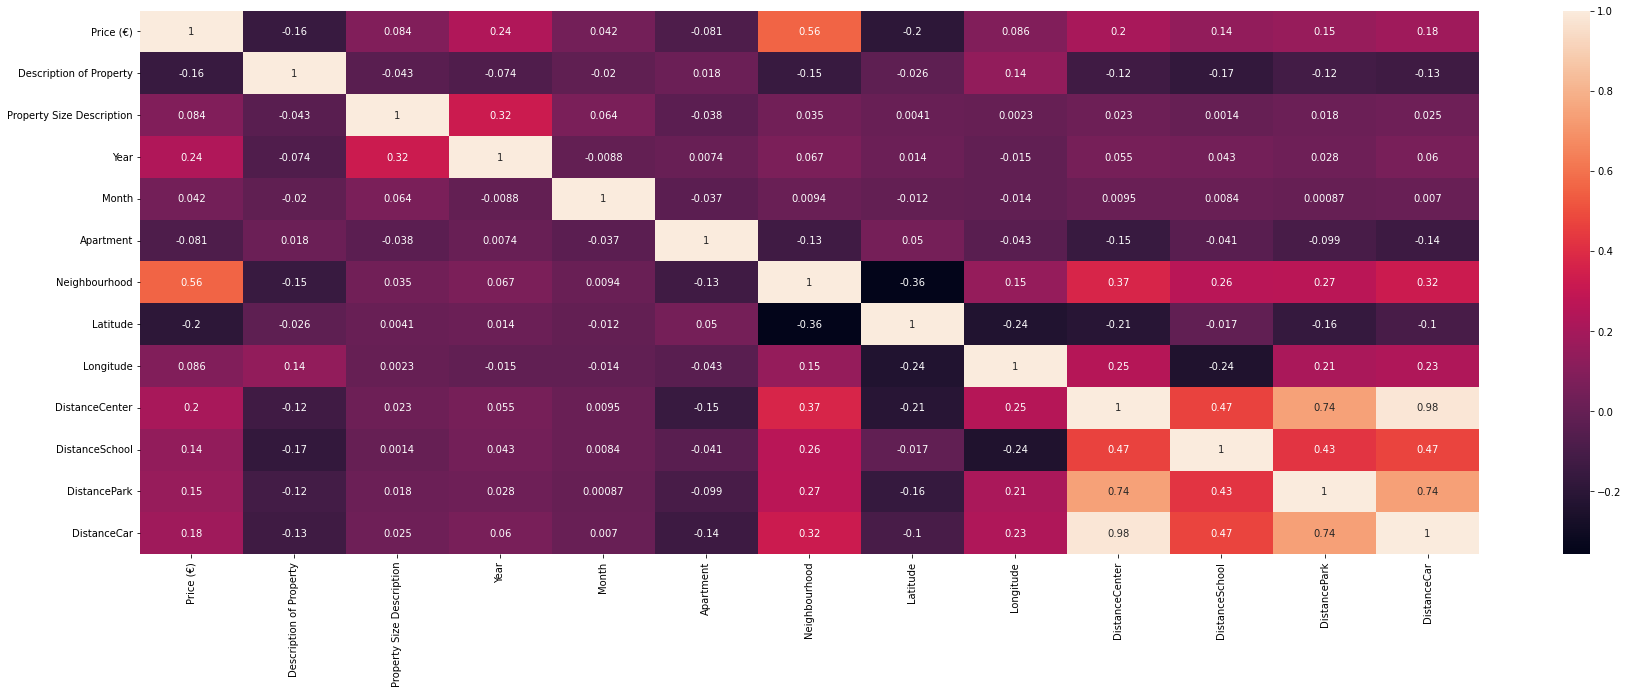

In [21]:
corr = irl.corr()

plt.figure(figsize = (30,10))
sns.heatmap(corr, annot = True)

In [22]:
irl.head()

,Price (€),Description of Property,Property Size Description,Year,Month,Apartment,Neighbourhood,Latitude,Longitude,DistanceCenter,DistanceSchool,DistancePark,DistanceCar
94123,280000.0,1,2,2014,1,0,221996.382933,51.891104,-8.474261,0.808257,0.371367,0.334321,0.607264
94124,370000.0,1,1,2014,1,0,338703.299756,51.844802,-8.312442,12.501636,0.597510,5.440909,11.244529
94125,130000.0,1,1,2014,1,0,150351.141667,51.903869,-8.471192,0.626745,0.323214,0.129914,0.238164
94126,155000.0,1,1,2014,1,0,269252.734786,51.911380,-8.450581,2.096941,0.447549,0.669517,1.805214
94127,210000.0,1,1,2014,1,0,234741.592357,51.882655,-8.507208,2.943974,0.503091,0.823622,2.329469


In [26]:
irl1 = irl[['Year', 'Neighbourhood', 'Latitude', 'Longitude', 'DistanceCenter', 'Price (€)', 'DistanceSchool', 'DistancePark', 'DistanceCar']]

In [27]:
#irl1.to_csv('features-selected-cork.csv')